# Pair Programming 25/05 Regresión lineal simple I - Tatiana y Guada

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sidetable
from scipy.stats import skew
from scipy.stats import kurtosistest
from scipy import stats
from scipy.stats import kstest
from scipy.stats import ks_2samp
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Ejercicio 1
Buscar un conjunto de datos a analizar:
Se recomienda que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilidar los análisis.

👩🏻👩🏻‍🦰💬

Hemos tomado el Dataset de Kaggle. "Salary Prediction Classification Classification on Salary whether less than 50K or greater than 50K". Este Dataset es acerca de la predicción del salario en la población adulta de cada estado de los Estados Unidos. Dejamos por aquí la explicación del contenido de las columnas para facilitarnos el análisis.

age: edad

workclass: Tipo de trabajo. 
Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

education:Nivel de educación. 
Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
education-num: Años de educación
    
marital-status: Estado civil. 
Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: ocupación. 
Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Relaciíon.
Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: Raza
White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: sexo
Female, Male.

capital-gain: se refiere al aumento en el valor de un activo de capital cuando se vende. En pocas palabras, una ganancia de capital ocurre cuando vende un activo por más de lo que pagó originalmente por él. Casi cualquier tipo de activo que posea es un activo de capital, ya sea un tipo de inversión (como acciones, bonos o bienes raíces) o algo comprado para uso personal (como muebles o un bote).

capital-loss: Una pérdida de capital es la pérdida en la que se incurre cuando un activo de capital , como una inversión o un bien inmueble, disminuye de valor. Esta pérdida no se realiza hasta que el activo se vende por un precio inferior al precio de compra original.

hours-per-week: horas trabajadas por semana

native-country: País de origen
United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: Rango salarial
<=50K or >50K


In [2]:
df = pd.read_csv("salary.csv")
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


La columna "fnlwgt" la eliminamos, ya que nos parece que sus datos no son relevantes en nuestro análisis.

In [3]:
df.drop("fnlwgt",axis=1, inplace=True)

# Ejercicio 2 
Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
Esto se hace para que comprendais mejor los datos con los que estais trabajando.
Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [4]:
df.shape

(32561, 14)

In [5]:
df.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [6]:
num_nulos = df.isnull().sum()
porcentaje = (num_nulos / df.shape[0] * 100).round(2)
porcentaje

age               0.0
workclass         0.0
education         0.0
education-num     0.0
marital-status    0.0
occupation        0.0
relationship      0.0
race              0.0
sex               0.0
capital-gain      0.0
capital-loss      0.0
hours-per-week    0.0
native-country    0.0
salary            0.0
dtype: float64

In [7]:
df.dtypes

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


# Ejercicio 3 
Realiza el ajuste lineal simple utilizando diversas métricas y realiza una gráfica mostrando los resultados.

In [9]:
df.stb.missing()#comprobamos que no tengan valores faltantes las variables a utilizar

,missing,total,percent
age,0,32561,0.0
workclass,0,32561,0.0
education,0,32561,0.0
education-num,0,32561,0.0
marital-status,0,32561,0.0
occupation,0,32561,0.0
relationship,0,32561,0.0
race,0,32561,0.0
sex,0,32561,0.0
capital-gain,0,32561,0.0


In [10]:
df.dtypes #comprobamos que las variables que vamos a usar sean de tipo númerico

age                int64
workclass         object
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

👩🏻👩🏻‍🦰💬

Con esto veremos como son nuestras gráficas para elegir que 2 columnas vamos a elegir.

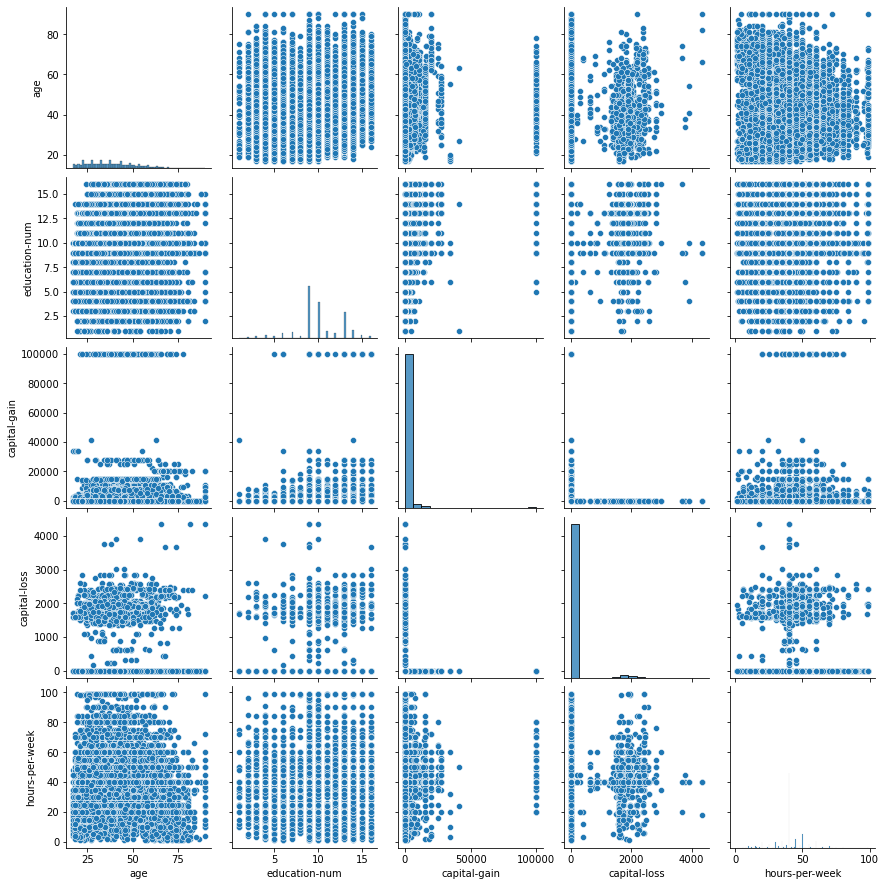

In [11]:
sns.pairplot(df) 

👩🏻👩🏻‍🦰💬

Hemos escogido la columna "capital-gain" como variable dependiente y la columna "hours-per-week" como variable independiente. Primero vamos a ver como son y si tenemos que limpiar algo en concreto.

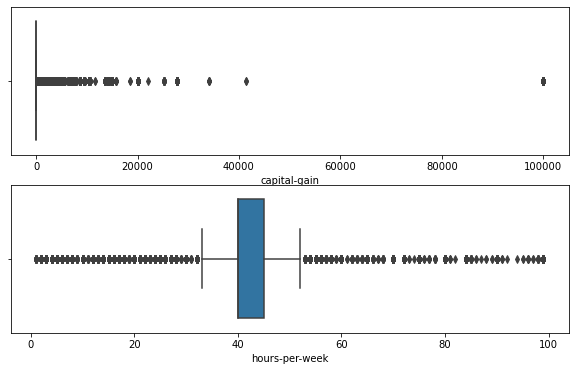

In [12]:
fig, axes = plt.subplots(2, 1, figsize=(10,6))
df_elegido = df[["capital-gain", "hours-per-week"]]
for i in range(len(df_elegido.columns)):
    sns.boxplot(x = df_elegido.columns[i], data = df, ax=axes[i]); # para trazar una línea de densidad

plt.show()

In [13]:
#veamos como son la media y la mediana en ambas columnas. Si no difieren mucho entre ellas, usaremos la media.
print(df["capital-gain"].median())
print(df["capital-gain"].mean())
print(df["hours-per-week"].median())
print(df["hours-per-week"].mean())

0.0
1077.6488437087312
40.0
40.437455852092995


In [14]:
def detectar_outliers(lista_columnas, dataframe): 
    
    dicc_indices = {} # creamos un diccionario donde almacenaremos índices de los outliers
    
    # iteramos por la lista de las columnas numéricas de nuestro dataframe
    for col in lista_columnas:
        
        #calculamos los cuartiles Q1 y Q3
        Q1 = np.nanpercentile(df[col], 25)
        Q3 = np.nanpercentile(df[col], 75)
        
        # calculamos el rango intercuartil
        IQR = Q3 - Q1
        
        # calculamos los límites
        outlier_step = 1.5 * IQR
        
        # filtramos nuestro dataframe para indentificar los outliers
        outliers_data = dataframe[(dataframe[col] < Q1 - outlier_step) | (dataframe[col] > Q3 + outlier_step)]
        
        
        if outliers_data.shape[0] > 0: # chequeamos si nuestro dataframe tiene alguna fila. 
        
            dicc_indices[col] = (list(outliers_data.index)) # si tiene fila es que hay outliers y por lo tanto lo añadimos a nuestro diccionario
        

    
    return dicc_indices 


lista_columnas = list(df_elegido.columns)
indices = detectar_outliers(lista_columnas, df_elegido)
indices

{'capital-gain': [0,
  8,
  9,
  59,
  60,
  84,
  101,
  105,
  106,
  113,
  132,
  197,
  198,
  206,
  208,
  227,
  230,
  263,
  271,
  272,
  276,
  279,
  281,
  285,
  297,
  300,
  303,
  311,
  329,
  341,
  342,
  393,
  413,
  421,
  432,
  436,
  484,
  489,
  520,
  521,
  534,
  566,
  593,
  598,
  610,
  613,
  619,
  632,
  637,
  643,
  651,
  656,
  665,
  666,
  675,
  704,
  713,
  722,
  724,
  729,
  735,
  738,
  742,
  746,
  750,
  789,
  793,
  805,
  807,
  831,
  844,
  872,
  889,
  893,
  915,
  934,
  976,
  978,
  989,
  998,
  999,
  1008,
  1012,
  1036,
  1043,
  1052,
  1061,
  1088,
  1108,
  1121,
  1145,
  1149,
  1160,
  1166,
  1199,
  1210,
  1213,
  1216,
  1218,
  1246,
  1250,
  1277,
  1284,
  1286,
  1316,
  1320,
  1335,
  1338,
  1349,
  1351,
  1368,
  1378,
  1396,
  1398,
  1426,
  1427,
  1433,
  1446,
  1452,
  1456,
  1460,
  1469,
  1482,
  1485,
  1493,
  1501,
  1503,
  1511,
  1517,
  1528,
  1554,
  1562,
  1574,
  1583,
  

In [15]:
for key, values in indices.items():
    media = df[key].mean() 
    mediana = df[key].median()
    
    if key == "capital-gain":
        for i in values: 
            df.loc[i,key] = media
    elif key == "hours-per-week":
        for i in values: 
            df.loc[i,key] = mediana
    else:
        pass
     



Una vez limpiados los outliers, podemos seguir trabajando con ellos.

In [16]:
x=df_elegido["capital-gain"].values.reshape(-1, 1) # Le hacemos el reshape ya que el modelo espera que le pasemos un array de 2 dimensiones con una única columna.En x ponemos la variable dependiente
y= df_elegido["hours-per-week"].values.reshape(-1, 1) # La variable independiente
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)


In [17]:
LR = LinearRegression(n_jobs=-1)
LR.fit(x_train, y_train)
y_predict_train = LR.predict(x_train)
y_prediction = LR.predict(x_test)

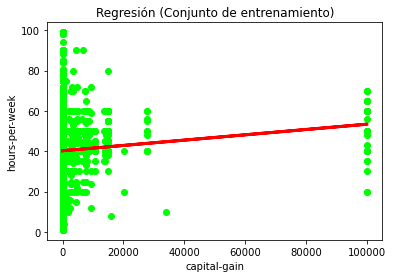

In [18]:
plt.scatter(x_test,y_test,color="lime")  # Plot a graph with X_train vs y_train
plt.plot(x_test,y_prediction,color="red", linewidth=3) 
plt.title('Regresión (Conjunto de entrenamiento)')
plt.xlabel("capital-gain")
plt.ylabel("hours-per-week")
plt.show()

👩🏻👩🏻‍🦰💬

Nuestra línea de regresión no es muy oblicua, por lo que es posible que todavía no hayamos ajustado del todo el módelo con el que estamos trabajando.

# Ejercicio 4 
Interpretación de los resultados.
Ahora interpreta los resultados obtenidos del ajuste lineal simple y explica lo mejor posible la naturaleza de los mismos.

In [19]:
# Para el conjunto de entrenamiento las méticas han sido
print('Para el conjunto train:---------------')
print('El valor de r2 score es ',r2_score(y_train,y_predict_train))
print('El MAE es',mean_absolute_error(y_train,y_predict_train))
print('El MSE es',mean_squared_error(y_train,y_predict_train))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_train,y_predict_train)))


# Para el conjunto de test las métricas han sido
print('Para el conjunto test:---------------')
print('El valor de r2 score es ',r2_score(y_test,y_prediction))
print('El MAE es',mean_absolute_error(y_test,y_prediction))
print('El MSE es',mean_squared_error(y_test,y_prediction))
print('EL RMSE es ',np.sqrt(mean_squared_error(y_test,y_prediction)))

Para el conjunto train:---------------
El valor de r2 score es  0.005962765458488506
El MAE es 7.483425149838003
El MSE es 151.14450888996444
EL RMSE es  12.294084304655001
Para el conjunto test:---------------
El valor de r2 score es  0.006501819089064664
El MAE es 7.577202727178278
El MSE es 153.01747771697592
EL RMSE es  12.370023351512959


👩🏻👩🏻‍🦰💬

Como hemos visto, podemos deducir varias cosas:

- el valor MAE es algo alto, por lo que el modelo no está ajustado del todo.

- el valor MSE es muy alto, por lo que los datos del modelo no se han ajustado en absoluto.

- el valor RMSE es alto, por lo que el modelo debe ajustarse algo más.

En conclusión:

-A día de hoy, no hemos sido capaces de ajustar el modelo para poder sacar unos datos concluyentes. Tendremos que trabajar más duro para poder solventar dichos problemas.

In [20]:
#Guardamos Df_elegido para seguir trabajando con él.
df_elegido.to_csv("df_elegido.csv")